# Anomaly Detection & Time Series |
# Assignment Theory Questions


## 1) What is Anomaly Detection?

-> Anomaly detection (also called outlier detection) is the process of identifying patterns in data that do not conform to expected behavior.
These unusual patterns are called anomalies or outliers.
They may indicate critical events like fraud, faults, cyberattacks, medical issues, or equipment failures.

Anomaly Detection in One Way
Anomaly detection is finding unusual patterns in data that don't fit what we expect.
There are three main types:
Point Anomaly → One data point is very different.
Example: Someone spends ₹2,00,000 in one transaction when normally people spend ₹5,000-₹20,000.
# Contextual Anomaly → The data is only unusual in a certain context (time, place, condition).
Example: 30°C temperature is fine in summer but abnormal in winter.
Collective Anomaly → A group of values together is unusual, even if each one alone looks normal.
## Example: Normal network requests, but thousands in a short time → possible cyberattack.

Point = single odd point
Contextual = odd depending on situation
Collective = odd group together


## 2) Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

### -> 1. Isolation Forest (iForest)
Approach:
## Based on the idea that anomalies are easier to isolate than normal points.
Builds random decision trees and checks how quickly a data point gets isolated.
Anomalies → isolated in fewer splits.

Best Use Cases:
Large high-dimensional datasets.
Fraud detection, system monitoring, intrusion detection.
Works well when anomalies are few and scattered.

### 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Approach:
Groups points into clusters based on density.
Points in low-density regions (not belonging to any cluster) are anomalies.

Best Use Cases:
Spatial or 2D/3D data where density is meaningful.
Detecting anomalies in geographical data (e.g., unusual GPS locations).
Works well when anomalies lie in sparse regions.

### 3. Local Outlier Factor (LOF)

Approach:
Compares the local density of a point with its neighbors.
If a point's density is much lower than its neighbors → anomaly.

Best Use Cases:
Data where anomalies are local (depends on neighborhood).
Good for datasets with varying density.
Example: Credit card fraud where spending patterns differ by user group.

Isolation Forest = isolates points → good for big, high-dim data
DBSCAN = density-based clusters → good for spatial anomalies
LOF = local density check → good for local, varying density data


## 3) What are the key components of a Time Series? Explain each with one example.

-> Key Components of a Time Series

A time series is data recorded over time (daily, monthly, yearly, etc.). It usually has four main components:

### 1. Trend (T)
The long-term movement (upward or downward) in the data over a long period.
It shows the overall direction.
Example:
Company sales increasing every year due to expansion → upward trend.

### 2. Seasonality (S)
Repeating patterns at fixed intervals (daily, weekly, monthly, yearly).
Caused by seasons, festivals, holidays, etc.
Example:
Ice cream sales peak in summer and drop in winter → seasonal effect.

### 3. Cyclic (C)
Long-term fluctuations that are not strictly seasonal.
Often linked to economic or business cycles (boom, recession).
No fixed periodicity (can last years).
Example:
Stock market rising during economic growth and falling during a recession → cyclic pattern.

### 4. Irregular / Residual / Noise (I)
Random, unpredictable variations.
Caused by unexpected events (natural disasters, strikes, pandemics).
Example:
A sudden drop in travel bookings due to COVID-19 lockdown → irregular component.


## 4) Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

### -> Stationarity in Time

Definition

A time series is called stationary if its statistical properties (mean, variance, autocorrelation) do not change over time.
In other words:
Constant mean 📉
Constant variance 📊
Constant covariance (relationship between values at different lags)

### Why Stationarity Matters?

Many forecasting models (like ARIMA) assume stationarity.
If a series is non-stationary, predictions may be misleading.

### How to Test for Stationarity?

1) Visual Inspection

Plot the series.
If mean or variance changes with time → non-stationary.
Summary Statistics

2) Split data into two parts.

Compare mean & variance of both → if very different → non-stationary.

3) Statistical Tests

Augmented Dickey-Fuller (ADF) Test
Null Hypothesis: Series is non-stationary.
If p-value < 0.05 → reject null → stationary.
KPSS Test (opposite assumption).


### How to Transform a Non-Stationary Series?

1) Differencing
Subtract current value from previous value.
Example: Y(t) - Y(t-1)
Removes trend.

2) Log Transformation
Apply log(Y) to stabilize variance.

3) Square Root or Box-Cox Transformation
Reduce heteroscedasticity (changing variance).

4) De-trending
Fit a regression line to the trend and remove it.

5) Seasonal Differencing
Subtract value from the same season in the previous cycle.
Example: Y(t) - Y(t-12) for monthly data with yearly seasonality.


## 5) Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

-> 1. AR (AutoRegressive Model)
Structure:
Equation:

Ytc+ϕ1​Yt−1​+ϕ2​Yt−2​+⋯+ϕp​Yt−p​+ϵ

Uses the past values of the series to predict the future.
Where p = number of lags.
Application:
Works well when data shows strong correlation with its own past values.

Example: Stock prices depending on past few days'
values.

2. MA (Moving Average Model)
Structure:
Uses past forecast errors (residuals) to predict the future.

Equation:

Yt​=c+ϕ1​Yt−1​+ϕ2​Yt−2​+⋯+ϕp​Yt−p​+ϵ

Where q = number of lagged errors.
Application:
Useful when errors are serially correlated.
Example: Demand forecasting where sudden shocks affect future values.

3. ARIMA (AutoRegressive Integrated Moving Average)
Structure:

Combines AR + MA + Differencing (I) to handle non-stationary data.
Notation: ARIMA(p, d, q)
p = AR terms
d = differencing order
q = MA terms

Application:
General-purpose forecasting when data shows trend but no strong seasonality.
Example: Monthly sales with an upward trend.

4. SARIMA (Seasonal ARIMA)

Structure:
Extends ARIMA to handle seasonality.
Notation: SARIMA(p, d, q)(P, D, Q, s)
(p, d, q) = non-seasonal part
(P, D, Q) = seasonal part
s = seasonal period (e.g., 12 for monthly data with yearly seasonality)

Application:
Time series with both trend + seasonality.
Example: Airline passenger traffic (yearly repeating pattern).

5. SARIMAX (SARIMA with Exogenous Variables)

Structure:
SARIMA + additional external (exogenous) variables that may influence the series.
Notation: SARIMAX(p, d, q)(P, D, Q, s) + X

Application:

When external factors affect the series.
Example: Sales forecasting using SARIMAX where holidays, promotions, or temperature are used as extra predictors.



# partical Questions

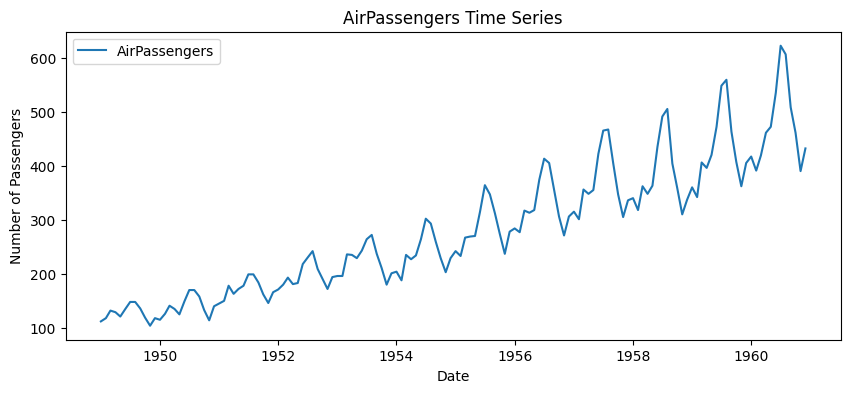

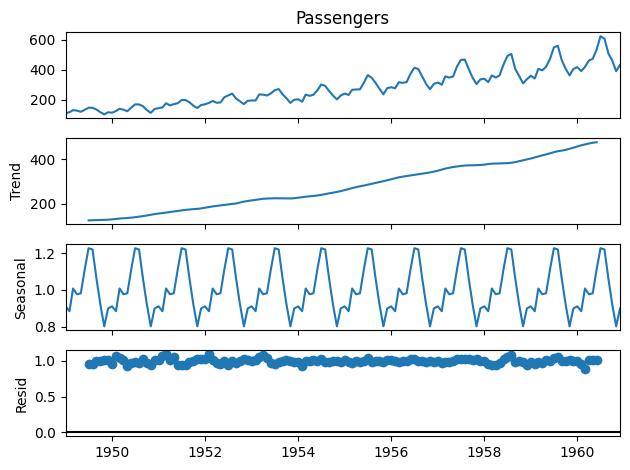

In [ ]:
# 6

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')


plt.figure(figsize=(10, 4))
plt.plot(data, label='AirPassengers')
plt.title("AirPassengers Time Series")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')


decomposition.plot()
plt.show()


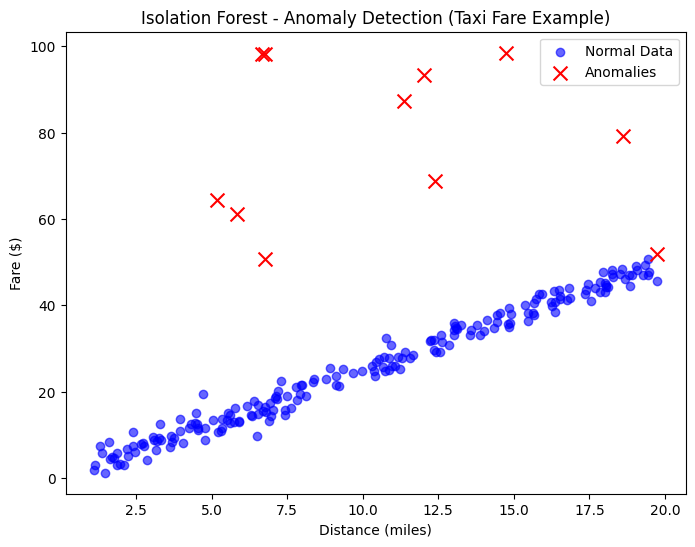

In [ ]:
# 7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


np.random.seed(42)
n_samples = 200

# Generate normal data (linear relation: fare ~ distance)
distance = np.random.uniform(1, 20, n_samples)
fare = distance * 2.5 + np.random.normal(0, 2, n_samples)

# Inject anomalies (unrealistic fares)
anomaly_distance = np.random.uniform(5, 20, 10)
anomaly_fare = np.random.uniform(50, 100, 10)

# Combine normal + anomaly data
distance = np.concatenate([distance, anomaly_distance])
fare = np.concatenate([fare, anomaly_fare])

data = pd.DataFrame({"distance": distance, "fare": fare})


iso_forest = IsolationForest(contamination=0.05, random_state=42)
data["anomaly"] = iso_forest.fit_predict(data[["distance", "fare"]])

# -1 = anomaly, 1 = normal
normal = data[data["anomaly"] == 1]
anomalies = data[data["anomaly"] == -1]


plt.figure(figsize=(8, 6))
plt.scatter(normal["distance"], normal["fare"], c="blue", label="Normal Data", alpha=0.6)
plt.scatter(anomalies["distance"], anomalies["fare"], c="red", label="Anomalies", marker="x", s=100)
plt.title("Isolation Forest - Anomaly Detection (Taxi Fare Example)")
plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($)")
plt.legend()
plt.show()


              Forecast   Lower 95%   Upper 95%
1961-01-01  447.222620  424.007631  470.437608
1961-02-01  422.734098  394.771418  450.696778
1961-03-01  457.700895  424.797899  490.603890
1961-04-01  492.277505  455.270832  529.284178
1961-05-01  505.563365  464.826093  546.300638
1961-06-01  565.671782  521.526198  609.817366
1961-07-01  651.986404  604.675663  699.297145
1961-08-01  639.634242  589.357591  689.910893
1961-09-01  543.058845  489.981676  596.136013
1961-10-01  493.727025  437.989892  549.464158
1961-11-01  426.938001  368.662186  485.213816
1961-12-01  470.135608  409.427181  530.844035


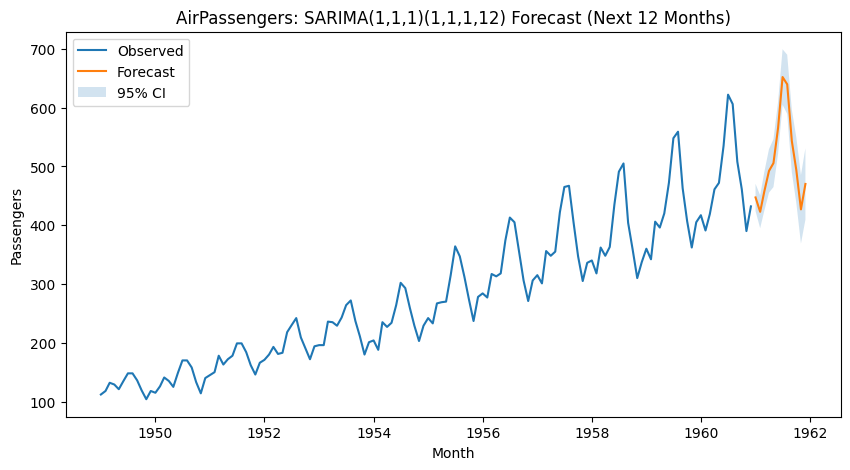

Model AIC: 922.2053774351383


In [4]:
# 8


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


values = [
    112,118,132,129,121,135,148,148,136,119,104,118,
    115,126,141,135,125,149,170,170,158,133,114,140,
    145,150,178,163,172,178,199,199,184,162,146,166,
    171,180,193,181,183,218,230,242,209,191,172,194,
    196,196,236,235,229,243,264,272,237,211,180,201,
    204,188,235,227,234,264,302,293,259,229,203,229,
    242,233,267,269,270,315,364,347,312,274,237,278,
    284,277,317,313,318,374,413,405,355,306,271,306,
    315,301,356,348,355,422,465,467,404,347,305,336,
    340,318,362,348,363,435,491,505,404,359,310,337,
    360,342,406,396,420,472,548,559,463,407,362,405,
    417,391,419,461,472,535,622,606,508,461,390,432
]
dates = pd.date_range(start="1949-01-01", periods=len(values), freq="MS")
ts = pd.Series(values, index=dates, name="Passengers")


model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12),
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)


n_forecast = 12
forecast_res = res.get_forecast(steps=n_forecast)
mean_forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

forecast_df = pd.DataFrame({
    "Forecast": mean_forecast,
    "Lower 95%": conf_int.iloc[:, 0],
    "Upper 95%": conf_int.iloc[:, 1]
})
print(forecast_df)


plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts.values, label="Observed")
plt.plot(mean_forecast.index, mean_forecast.values, label="Forecast")
plt.fill_between(mean_forecast.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 alpha=0.2, label="95% CI")
plt.title("AirPassengers: SARIMA(1,1,1)(1,1,1,12) Forecast (Next 12 Months)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.show()

print("Model AIC:", res.aic)

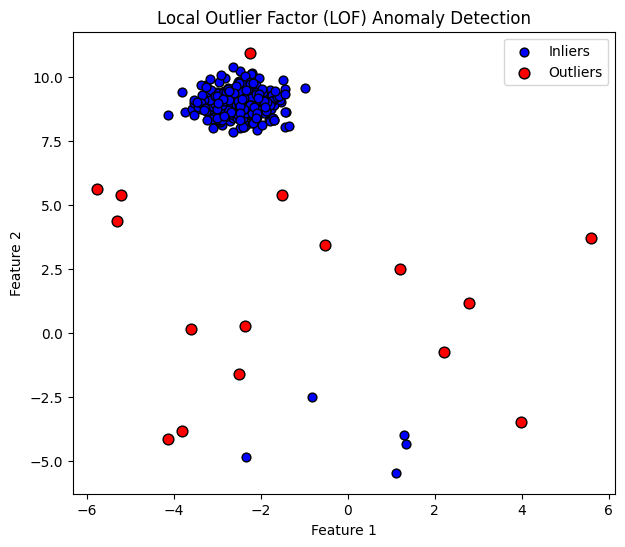

In [5]:
# 9

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs


X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)

# Add some anomalies
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.concatenate([X, X_outliers], axis=0)


lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)  # -1 = outlier, 1 = inlier


plt.figure(figsize=(7, 6))

# Normal points
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
            c="blue", edgecolor="k", s=40, label="Inliers")

# Anomalies
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1],
            c="red", edgecolor="k", s=60, label="Outliers")

plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## (10)

Real-time Data Science Workflow for Power Grid Monitoring

### 1. Anomaly Detection in Streaming Data

1) Goal: Identify sudden spikes or drops in consumption that may signal faults, theft, or abnormal demand.

2) Techniques:
Isolation Forest (IF)
Works well on high-dimensional numerical data.
Robust for streaming and can flag unusual consumption patterns per region.

3) Local Outlier Factor (LOF)

Effective for neighborhood-based anomaly detection.
Could detect anomalies in a region compared to its neighbors.

4) DBSCAN

Detects clusters and labels sparse points as anomalies.
Useful if anomalies form rare but structured clusters.

5) Implementation in streaming:

Use sliding windows (e.g., last 1-2 hours of 15-min intervals).
Continuously score new data points for anomaly likelihood.
Flag anomalies in real time for operator alerts.

### 2. Short-term Forecasting Model
Goal: Forecast next few hours of energy demand.

Models:
SARIMAX (Seasonal ARIMA with exogenous features)
Handles seasonality (daily patterns, weekly cycles).
Incorporates exogenous factors like weather (temperature, humidity).
Example: SARIMAX(order=(p,d,q), seasonal_order=(P,D,Q,96), exog=weather)
(96 = 15-min intervals * 24 hours).
Alternative: If scalability is critical, consider Prophet or LSTM (deep learning), but SARIMAX is a strong statistical baseline.

### 3. Validation & Monitoring

Validation:

Train/test split on historical data (rolling forecast origin).
Use metrics: MAE, RMSE, MAPE.
Backtest across multiple seasons and weather conditions.

Monitoring:

Drift detection: Compare live error distribution vs. historical performance.
Retraining schedule: Weekly or monthly as demand patterns shift.

Dashboard: Real-time anomaly rate + forecast accuracy monitoring.

### 4. Business Impact

Operational efficiency:
Forecasts guide load balancing → ensures enough supply without overproduction.

Cost savings:
Prevents costly blackouts by anticipating demand surges.

Grid reliability:
Detects fraud, leakage, or equipment faults early.

Decision-making:
Informs dynamic pricing strategies.
Supports investment planning (e.g., where new capacity is needed).